# Photon gas

In [30]:
import random as r
import math as m
import matplotlib.pyplot as plt
import numpy as np 

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Random Seed
r.seed(42)

In [35]:

numberOfIterations = 1000
beta = 1.0

def calculateOccupancy(beta=1.0):

    trialnj = 1
    currentnj = 1
    njsum = 0
    numStatesVisited = 0
    estimatedOccupancy=0

    for i in range(numberOfIterations):        
        if r.random() < 0.50: trialnj = currentnj + 1       
        else: trialnj = currentnj - 1             
        
        if trialnj < 0: trialnj = 0 #Test if trialnj < 0, if it is, force it to be 0
        
        alpha = min(1., np.exp( -beta*(trialnj - currentnj) ))
        if r.random() < alpha:
            #update current sample:
            currentnj = trialnj   
             ###this is the incorrect solution
            #njsum += currentnj #  sum over ocupations        
            #numStatesVisited +=1 #sum visited state
        
        ###this is the correct solution
        njsum += currentnj #  sum over ocupations        
        numStatesVisited +=1 #sum visited state
    
    """  Modification
    Metropolis algorithm implementation to calculate <n_j>
    Tasks:
    1) Loop from int i = 0 to numberOfiterations
    2) Call random(0, 1) to perform a trial move to randomly increase
        or decrease trialnj by 1.
        Hint: use trialnj = currentnj + 1;
    3) Test if trialnj < 0, if it is, force it to be 0
    4) Accept the trial move with probability defined in section 3.1.4.1
        Note: Accepting the trial move means updating current sample (currentnj)
        with the new move (trialnj);
    5) sum currentnj and increase numStatesVisited by 1

    *** END MODIFICATION ***
    """
        
    estimatedOccupancy = njsum/numStatesVisited

    return estimatedOccupancy

# perform a single calculation
estimatedOccupancy = calculateOccupancy(beta=beta)
print(estimatedOccupancy)

0.5735512630014858


In [39]:
x=np.linspace(0.1,5)
analytical_y= 1/(np.exp(x)-1)

In [40]:
estimated_y=[calculateOccupancy(beta=b) for b in x]
error = np.abs(analytical_y - estimated_y)

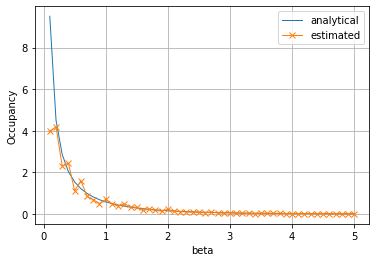

In [41]:
fig, ax = plt.subplots(1)
ax.plot(x,analytical_y, label='analytical',c='tab:blue', lw=1)
ax.plot(x,estimated_y, label='estimated', marker='x', c='tab:orange', lw = 1)
ax.set_xlabel("beta")
ax.set_ylabel('Occupancy')
ax.grid(which='both')
ax.legend()
#plt.savefig('photon_distribution.png',dpi=300)
plt.show()